<a href="https://colab.research.google.com/github/jerom19/fraud_transaction/blob/main/fraud_transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
data=pd.read_csv('/content/Fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,0.0
97223,10,PAYMENT,12171.47,C1843902873,0.0,0.00,M2011839805,0.0,0.0,0.0,0.0


In [4]:
data.shape

(42271, 11)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            97225 non-null  int64  
 1   type            97225 non-null  object 
 2   amount          97225 non-null  float64
 3   nameOrig        97225 non-null  object 
 4   oldbalanceOrg   97225 non-null  float64
 5   newbalanceOrig  97225 non-null  float64
 6   nameDest        97225 non-null  object 
 7   oldbalanceDest  97225 non-null  float64
 8   newbalanceDest  97224 non-null  float64
 9   isFraud         97224 non-null  float64
 10  isFlaggedFraud  97224 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.2+ MB


In [71]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [79]:
data['isFraud'] = data['isFraud'].fillna('U')

In [77]:
data['newbalanceDest'] = data['newbalanceDest'].fillna('U')

In [78]:
data['isFlaggedFraud'] = data['isFlaggedFraud'].fillna('U')

In [80]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [81]:
data.isnull().values.any()

False

In [106]:
print(data.duplicated().sum())

0


In [83]:
X = data[data['nameDest'].str.contains('M')]
X.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


Visualization

<ipython-input-84-534e03557dc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

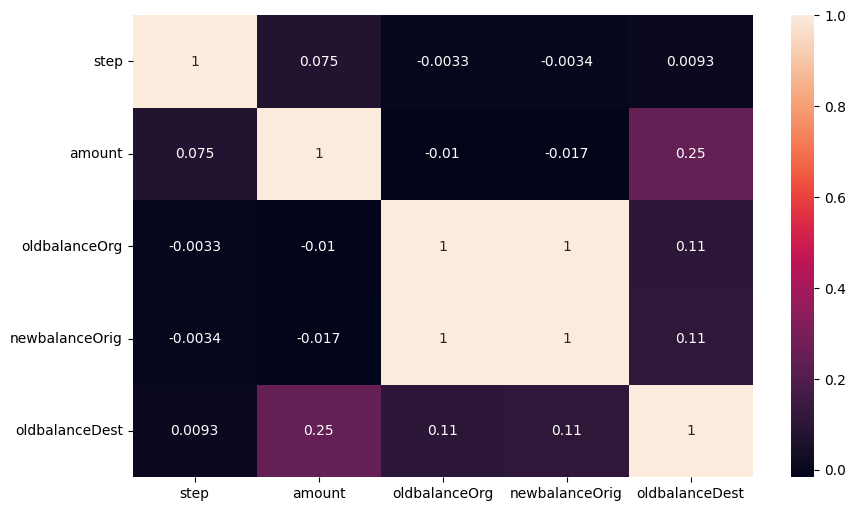

In [84]:
corr=data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

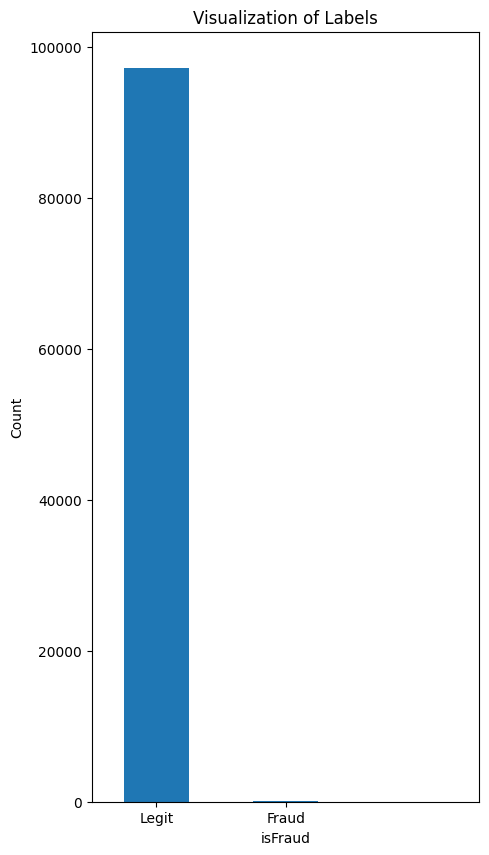

In [85]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = data.value_counts(data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

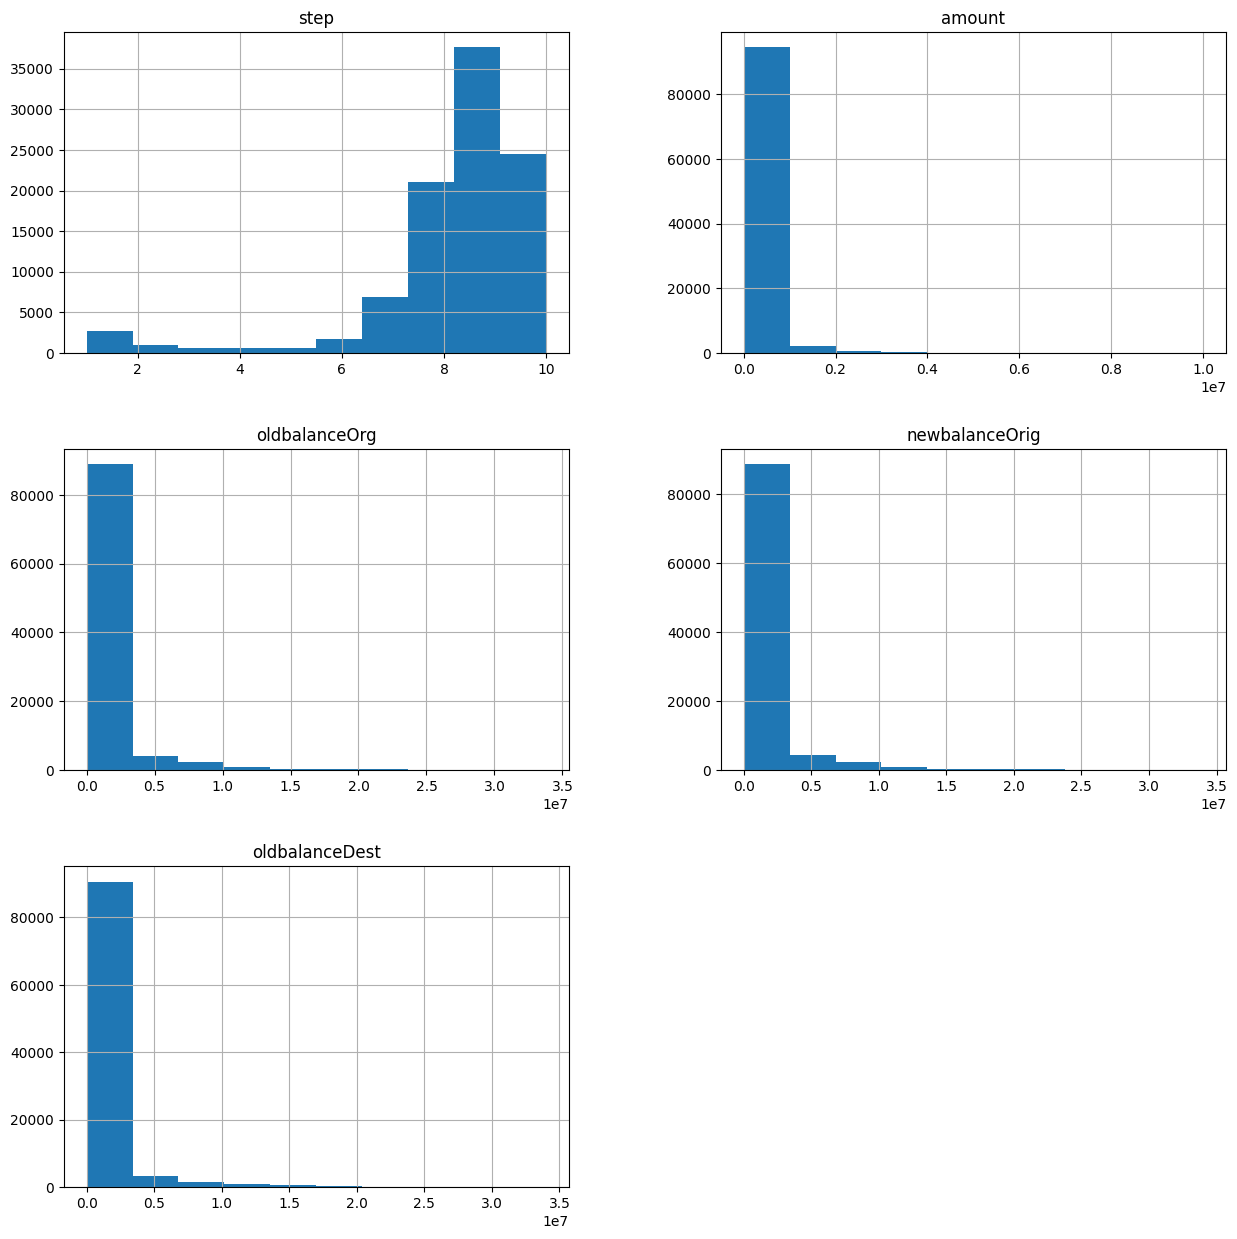

In [86]:
data.hist(figsize = (15, 15))
plt.show()

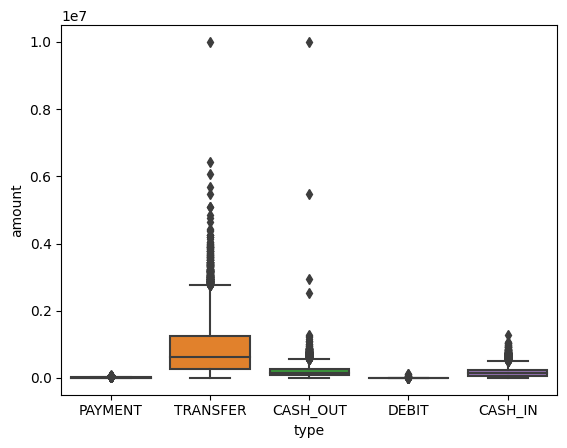

In [87]:
sns.boxplot(x='type', y='amount', data=data)
plt.show()

ENCODING

In [88]:
le = LabelEncoder()
data['type_encoded'] = le.fit_transform(data['type'])

# move 'type_encoded' column to the position where 'type' column is
type_pos = data.columns.get_loc('type')
data.insert(type_pos, 'type_encoded', data.pop('type_encoded'))

# remove the 'type' column
data.drop('type', axis=1, inplace=True)

In [89]:
le = LabelEncoder()
data['nameOrig_encoded'] = le.fit_transform(data['nameOrig'])

type_pos = data.columns.get_loc('nameOrig')
data.insert(type_pos, 'nameOrig_encoded', data.pop('nameOrig_encoded'))

data.drop('nameOrig', axis=1, inplace=True)

In [90]:
le = LabelEncoder()
data['nameDest_encoded'] = le.fit_transform(data['nameDest'])

type_pos = data.columns.get_loc('nameDest')
data.insert(type_pos, 'nameDest_encoded', data.pop('nameDest_encoded'))

data.drop('nameDest', axis=1, inplace=True)

In [91]:
data.head()

,step,type_encoded,amount,nameOrig_encoded,oldbalanceOrg,newbalanceOrig,nameDest_encoded,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,11524,170136.0,160296.36,31094,0.0,0.0,0.0,0.0
1,1,3,1864.28,33387,21249.0,19384.72,32374,0.0,0.0,0.0,0.0
2,1,4,181.00,15206,181.0,0.00,9020,0.0,0.0,1.0,0.0
3,1,1,181.00,89217,181.0,0.00,8018,21182.0,0.0,1.0,0.0
4,1,3,11668.14,52540,41554.0,29885.86,16202,0.0,0.0,0.0,0.0


<ipython-input-92-534e03557dc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

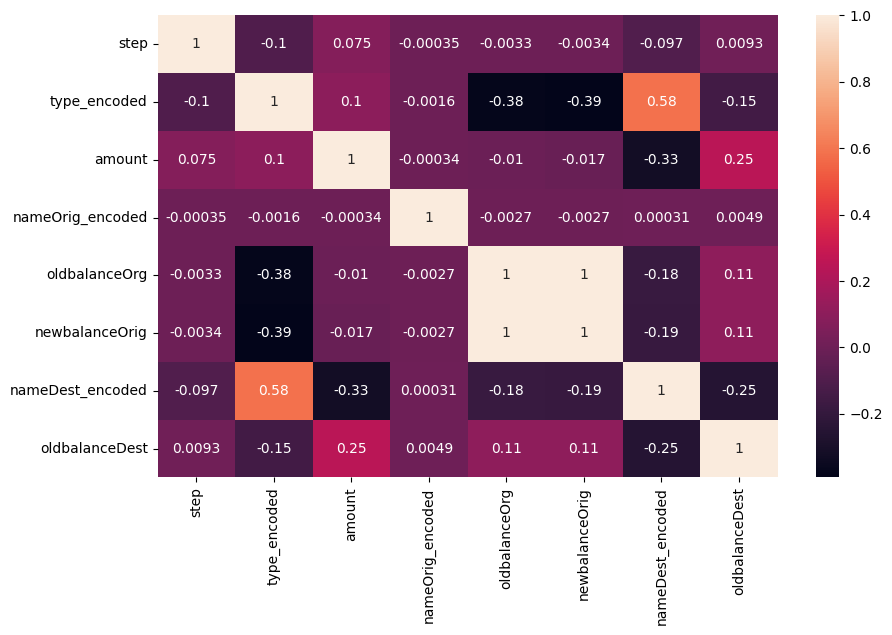

In [92]:
corr=data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


Analysing

In [96]:
data['isFraud'].value_counts()

0.0    97110
1.0      114
U          1
Name: isFraud, dtype: int64

In [97]:
data['isFlaggedFraud'].value_counts()

0.0    97224
U          1
Name: isFlaggedFraud, dtype: int64

In [98]:
fraud_type = data[data['isFraud']==1].groupby('type_encoded')['isFraud'].count()
flaggedFraud_type = data[data['isFlaggedFraud']==1].groupby('type_encoded')['isFlaggedFraud'].count()

In [99]:
print(f'Fraud per transaction type: \n{fraud_type}\n \nFlagged fraud per transaction type: \n{flaggedFraud_type}')

Fraud per transaction type: 
type_encoded
1    58
4    56
Name: isFraud, dtype: int64
 
Flagged fraud per transaction type: 
Series([], Name: isFlaggedFraud, dtype: int64)


Train and Test

In [100]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [107]:
clf.fit(X_train, y_train)

ValueError: ignored

In [111]:
y_pred = clf.predict(X_val)
y_pred

ValueError: ignored

In [110]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

NameError: ignored